# A brief demo of the WBGAPI module

[WBGAPI](https://pypi.org/project/wbgapi) is a python package for accessing the [World Bank's open data API](https://data.worldbank.org/developers). Unlike some other python packages, this one references a single API database at a time instead of the API as a whole, which provides greater transparency and control over the data you get.

This notebook is a demo to get you started, based on a presentation I gave at the World Bank in July, 2020.
More information is available at <https://pypi.org/project/wbgapi>. 

In [14]:
import wbgapi as wb   # I use wb as a namespace in all my work
import pandas as pd   # optional but highly recommended for wbgapi
import matplotlib.pyplot as plt

%matplotlib inline

wbgapi is designed around the fact that the API consists of several dozen different databases, each with independent series, countries and time dimensions, but with strong overlaps.

wbgapi (wb) has 9 submodules that correspond to the major components of the API:

Feature  | Description
-------  | -----------
source   | Databases
series   | Indicators
economy  | Countries/economies/aggregates
data     | Data
topic    | Indicator topics
time     | Time
region   | Regions
income   | Income Groups
lending  | Lending types

And common functions for each feature:

Function     | Description | Example
------------ | ----------- | -------
`info()`     | show summary table | `wb.time.info()`
`list()`     | return elements one at a time | `wb.economy.list()`
`get()`      | return a single element       | `wb.series.get('SP.POP.TOTL')`
`fetch()`    | Data requests                 | `wb.data.fetch('SP.POP.TOTL')`

And **lots** of inline help, e.g:

In [15]:
?wb.data.fetch

In [16]:
wb.source.info()

id,name,lastupdated
1,Doing Business,2019-10-23
2,World Development Indicators,2020-07-01
3,Worldwide Governance Indicators,2019-11-07
5,Subnational Malnutrition Database,2016-03-21
6,International Debt Statistics,2019-12-02
11,Africa Development Indicators,2013-02-22
12,Education Statistics,2020-04-21
13,Enterprise Surveys,2017-01-03
14,Gender Statistics,2020-07-02
15,Global Economic Monitor,2019-09-13


With WBGAPI you only target one database at a time, either through the `db` parameter passed to the call, or by setting a global variable. WDI (db=2) is the default global database, but you can change it either per call or globally:

```
wb.series.info(db=1) # fetch indicators from Doing Business

# same thing
wb.db = 1
wb.series.info()
```

In [31]:
# here, we fetch indicators from the Logistics Performance Indicators database only, not the default WDI
wb.series.info(db=66)

id,value
LP.LPI.CUST.RK,"Efficiency of the clearance process, rank (1=highest performer)"
LP.LPI.CUST.XQ,"Efficiency of the clearance process, score (1=low to 5=high)"
LP.LPI.INFR.RK,"Quality- of trade and transport-related infrastructure, rank (1=highest performer)"
LP.LPI.INFR.XQ,"Quality of trade- and transport-related infrastructure, score (1=low to 5=high)"
LP.LPI.ITRN.RK,"Ease of arranging competitively priced international shipments, rank (1=highest performer)"
LP.LPI.ITRN.XQ,"Ease of arranging competitively priced international shipments, score (1=low to 5=high)"
LP.LPI.LOGS.RK,"Competence and quality of logistics services, rank (1=highest performer)"
LP.LPI.LOGS.XQ,"Competence and quality of logistics services, score (1=low to 5=high)"
LP.LPI.OVRL.RK,Logistics performance index: Overall rank (1=highest performance)
LP.LPI.OVRL.RK.LB,"Logistics performance index: Overall rank (1=highest performance), lower bound"


In [32]:
# same for economies; this is a shorter country list than in the WDI
wb.economy.info(db=66)

id,value,region,incomeLevel
AFG,Afghanistan,SAS,LIC
AGO,Angola,SSF,LMC
ALB,Albania,ECS,UMC
ARE,United Arab Emirates,MEA,HIC
ARG,Argentina,LCN,UMC
ARM,Armenia,ECS,UMC
AUS,Australia,EAS,HIC
AUT,Austria,ECS,HIC
AZE,Azerbaijan,ECS,UMC
BDI,Burundi,SSF,LIC


In [33]:
# and a much shorter time dimension
wb.time.info(db=66)

id,value
YR2007,2007
YR2010,2010
YR2012,2012
YR2014,2014
YR2016,2016
YR2018,2018
,6 elements


You can use the search feature to search metadata for keywords. By itself this is not yet very iPython
friendly yet, so I added some wrapper code to make a nice table. Something to improve over the summer :)

In [36]:
search_results = [row.id for row in wb.search('fossil fuels', concepts='Series')]
wb.series.info(search_results)

id,value
EG.USE.COMM.CL.ZS,Alternative and nuclear energy (% of total energy use)
EN.ATM.CO2E.KD.GD,CO2 emissions (kg per 2010 US$ of GDP)
EN.ATM.CO2E.PP.GD.KD,CO2 emissions (kg per 2017 PPP $ of GDP)
EN.ATM.CO2E.PP.GD,CO2 emissions (kg per PPP $ of GDP)
EN.ATM.CO2E.KT,CO2 emissions (kt)
EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita)
EN.CO2.ETOT.ZS,"CO2 emissions from electricity and heat production, total (% of total fuel combustion)"
EN.ATM.CO2E.GF.ZS,CO2 emissions from gaseous fuel consumption (% of total)
EN.ATM.CO2E.GF.KT,CO2 emissions from gaseous fuel consumption (kt)
EN.ATM.CO2E.LF.ZS,CO2 emissions from liquid fuel consumption (% of total)


Here is a typical data query that returns rows as python dictionaries. You can pass series codes, country codes
(ISO-3) or time codes as single values or lists, or omit them entirely to get all values. Time values can be
numeric, and use python ranges to specify intervals. This example returns population data for 2 countries
at 5-year intervals.

In [37]:
for row in wb.data.fetch('SP.POP.TOTL', ['ARG', 'CHL'], time=range(1980, 2020, 5)):
    print(row)

{'value': 17969353, 'series': 'SP.POP.TOTL', 'economy': 'CHL', 'aggregate': False, 'time': 'YR2015'}
{'value': 17062536, 'series': 'SP.POP.TOTL', 'economy': 'CHL', 'aggregate': False, 'time': 'YR2010'}
{'value': 16182721, 'series': 'SP.POP.TOTL', 'economy': 'CHL', 'aggregate': False, 'time': 'YR2005'}
{'value': 15342353, 'series': 'SP.POP.TOTL', 'economy': 'CHL', 'aggregate': False, 'time': 'YR2000'}
{'value': 14380866, 'series': 'SP.POP.TOTL', 'economy': 'CHL', 'aggregate': False, 'time': 'YR1995'}
{'value': 13274623, 'series': 'SP.POP.TOTL', 'economy': 'CHL', 'aggregate': False, 'time': 'YR1990'}
{'value': 12257236, 'series': 'SP.POP.TOTL', 'economy': 'CHL', 'aggregate': False, 'time': 'YR1985'}
{'value': 11419348, 'series': 'SP.POP.TOTL', 'economy': 'CHL', 'aggregate': False, 'time': 'YR1980'}
{'value': 43131966, 'series': 'SP.POP.TOTL', 'economy': 'ARG', 'aggregate': False, 'time': 'YR2015'}
{'value': 40788453, 'series': 'SP.POP.TOTL', 'economy': 'ARG', 'aggregate': False, 'time': 

Or you can return [pandas](https://pypi.org/project/pandas) dataframes. Here is a similar query, this time requesting per-capita income for all countries in the East Asia Pacific (EAP) region.

In [22]:
df = wb.data.DataFrame('NY.GDP.PCAP.CD', wb.region.members('EAP'), time=range(1980, 2020, 5), labels=True)
df

,Country,YR1980,YR1985,YR1990,YR1995,YR2000,YR2005,YR2010,YR2015
MYS,Malaysia,1774.741454,2000.147901,2441.741991,4329.707364,4043.662051,5587.025650,9040.566251,9955.242127
ASM,American Samoa,NaN,NaN,NaN,NaN,NaN,8444.981700,10271.224523,11843.331183
PHL,Philippines,685.221461,566.261999,715.913712,1062.133065,1072.809064,1244.349041,2217.474009,3001.040371
VNM,Vietnam,NaN,231.452328,95.188250,276.812667,390.093326,687.479736,1317.890706,2085.101484
MMR,Myanmar,NaN,NaN,NaN,NaN,190.606232,244.882350,979.051630,1287.430487
THA,Thailand,682.929843,747.703437,1508.942737,2846.586738,2007.735175,2894.062656,5076.340174,5840.046523
IDN,Indonesia,491.579526,516.960993,585.076550,1026.393420,780.190201,1263.287321,3122.362815,3331.695128
CHN,China,194.804722,294.458849,317.884673,609.656679,959.372484,1753.417829,4550.453596,8066.942424
KIR,Kiribati,652.865121,502.065271,549.855507,724.856583,796.888175,1214.556667,1516.811869,1542.575250
KHM,Cambodia,NaN,NaN,NaN,322.931788,302.577164,474.111228,785.502283,1162.904920


Dataframes give you access to all of pandas features for data computation and transformation. Here, we just convert the previous data frame from raw values to percent change (at 5-year intervals):

In [23]:
df.set_index('Country').pct_change(axis=1)

,YR1980,YR1985,YR1990,YR1995,YR2000,YR2005,YR2010,YR2015
Country,,,,,,,,
Malaysia,NaN,0.127008,0.220781,0.773204,-0.066066,0.381675,0.618136,0.101175
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,0.216252,0.153059
Philippines,NaN,-0.173607,0.264280,0.483605,0.010051,0.159898,0.782035,0.353360
Vietnam,NaN,NaN,-0.588735,1.908055,0.409232,0.762347,0.916988,0.582151
Myanmar,NaN,NaN,NaN,NaN,NaN,0.284755,2.998049,0.314977
Thailand,NaN,0.094847,1.018103,0.886478,-0.294687,0.441456,0.754053,0.150444
Indonesia,NaN,0.051632,0.131762,0.754289,-0.239872,0.619204,1.471617,0.067043
China,NaN,0.511559,0.079556,0.917855,0.573627,0.827672,1.595191,0.772778
Kiribati,NaN,-0.230982,0.095187,0.318267,0.099374,0.524124,0.248861,0.016985


Basic panda charts (using [matplotlib](https://pypi.org/project/matplotlib)) are straight forward. Of course, you can use any plotting package you like: [seaborn](https://pypi.org/project/seaborn), [plotly](https://pypi.org/project/plotly), etc. Here is a plot of per-capita income for 3 countries an 2 decades:

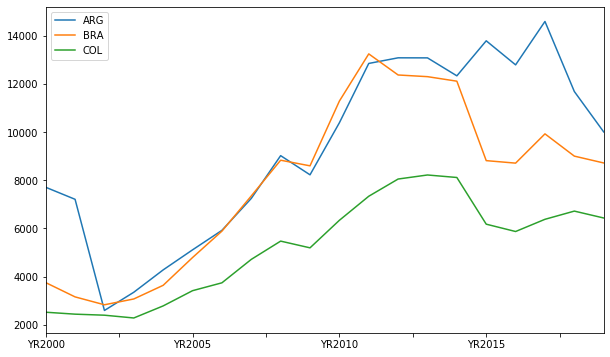

In [24]:
wb.data.DataFrame('NY.GDP.PCAP.CD', ['BRA', 'ARG', 'COL'], range(2000, 2020), index='time').plot(figsize=(10, 6))
plt.show()

## A few Stupid API Tricks

#### What's the distribution of poverty estimates over time?

The `mrnev` parameter lets you return the most recent non-empty values. If this is set to 1 then WBGAPI typically does not include a time dimension in the data frame. You can specifically request this with the `columns` or `index` parameter, as well as request numeric values for the time dimension. In this case, this gives an interesting view of the time variation for poverty estimates (SI.POV.NAHC)

In [54]:
df = wb.data.DataFrame('SI.POV.NAHC', mrnev=1, columns='time', numericTimeKeys=True)
df

,1993,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.5,NaN,NaN,NaN
AGO,NaN,NaN,NaN,36.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN
ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.6,NaN,NaN,NaN,NaN
YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.6,NaN,NaN,NaN,NaN,NaN
ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.5,NaN,NaN,NaN,NaN,NaN
ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.4,NaN,NaN,NaN,NaN


Here's an easier to understand view of the previous data frame using matplotlib to chart:

(I assigned the plot result to a variable to avoid some output kruft)

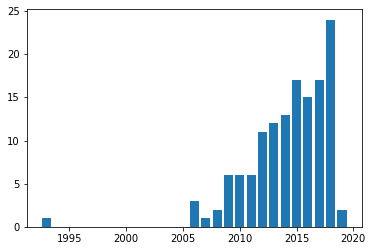

In [55]:
counts = df.count()
ax = plt.bar(counts.index, counts)

#### Do indicators vary across different versions of the WDI?

Most databases in the API have 3 dimensions: series, country (or economy) and time. But some have 4 dimensions.
The WDI database (db=57) includes a `version` dimension that lets you fetch indicators from previous vintages. Here
is how you can explore non-standard dimensions:

In [38]:
wb.source.concepts(db=57)

{'economy': {'key': 'country', 'value': 'Country'},
 'series': {'key': 'series', 'value': 'Series'},
 'time': {'key': 'time', 'value': 'Time'},
 'version': {'key': 'version', 'value': 'Version'}}

In [48]:
versions = [row['id'] for row in wb.source.features('version', db=57)]
print(versions[-20:])

['201802', '201804', '201805', '201806', '201807', '201808', '201809', '201810', '201811', '201901', '201903', '201904', '201906', '201909', '201910', '201912', '202002', '202003', '202004', '202005']


You can pass non-standard dimensions as parameters to `wb.data.fetch` `wb.data.get` and `wb.data.DataFrame`.
In this example, the version parameter specifies the year and month of the WDI revision. Requesting versions
on intervals of 100 thus gives you the April release of every year in the requested range.
You can compare values across different database versions to see if they've changed.

In [50]:
df = wb.data.DataFrame('SP.POP.TOTL', 'BRA', db=57, time=range(2000, 2020),
                       version=range(201004, 202004, 100), index='time')
df

,201004,201104,201204,201304,201404,201504,201604,201704,201804,201904
YR2000,174174447.0,174174447.0,174425387.0,174425387.0,174504898.0,174504898.0,175786441.0,175786441.0,175287587.0,175287587.0
YR2001,176659138.0,176659138.0,176877135.0,176877135.0,176968205.0,176968205.0,178419396.0,178419396.0,177750670.0,177750670.0
YR2002,179123364.0,179123364.0,179289227.0,179289227.0,179393768.0,179393768.0,181045592.0,181045592.0,180151021.0,180151021.0
YR2003,181537359.0,181537359.0,181633074.0,181633074.0,181752951.0,181752951.0,183627339.0,183627339.0,182482149.0,182482149.0
YR2004,183863524.0,183863524.0,183873377.0,183873377.0,184010283.0,184010283.0,186116363.0,186116363.0,184738458.0,184738458.0
YR2005,186074634.0,186074634.0,185986964.0,185986964.0,186142403.0,186142403.0,188479240.0,188479240.0,186917361.0,186917361.0
YR2006,188158438.0,188158438.0,187958211.0,187958211.0,188134315.0,188134315.0,190698241.0,190698241.0,189012412.0,189012412.0
YR2007,190119995.0,190119995.0,189798070.0,189798070.0,189996976.0,189996976.0,192784521.0,192784521.0,191026637.0,191026637.0
YR2008,191971506.0,191971506.0,191543237.0,191543237.0,191765567.0,191765567.0,194769696.0,194769696.0,192979029.0,192979029.0
YR2009,NaN,193733795.0,193246610.0,193246610.0,193490922.0,193490922.0,196701298.0,196701298.0,194895996.0,194895996.0


Again, the same data frame plotted for ease of understanding:

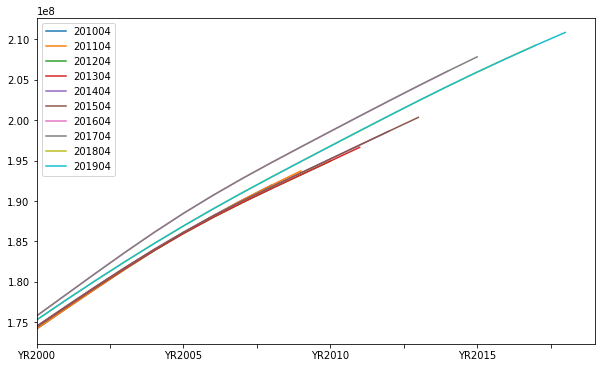

In [52]:
ax = df.plot(figsize=(10, 6))

## A couple of handy utilities

#### Metadata

There are a set of metadata functions for fetching metadata at the indicator or economy level, or combinations.
Footnotes are also possible (`wb.data.footnote`):

In [29]:
wb.series.metadata.get('SP.POP.TOTL', economies=['KEN', 'TZA'])

field,value
Aggregationmethod,Sum
Developmentrelevance,"Increases in human population, whether as a result of immigration or more births than deaths, can impact natural resources and social infrastructure. This can place pressure on a country's sustainability. A significant growth in population will negatively impact the availability of land for agricultural production, and will aggravate demand for food, energy, water, social services, and infrastructure. On the other hand, decreasing population size - a result of fewer births than deaths, and people moving out of a country - can impact a government's commitment to maintain services and infrastructure."
Generalcomments,Relevance to gender indicator: disaggregating the population composition by gender will help a country in projecting its demand for social services on a gender basis.
IndicatorName,"Population, total"
License_Type,CC BY-4.0
License_URL,https://datacatalog.worldbank.org/public-licenses#cc-by
Limitationsandexceptions,"Current population estimates for developing countries that lack (i) reliable recent census data, and (ii) pre- and post-census estimates for countries with census data, are provided by the United Nations Population Division and other agencies. The cohort component method - a standard method for estimating and projecting population - requires fertility, mortality, and net migration data, often collected from sample surveys, which can be small or limited in coverage. Population estimates are from demographic modeling and so are susceptible to biases and errors from shortcomings in both the model and the data. In the UN estimates the five-year age group is the cohort unit and five-year period data are used; therefore interpolations to obtain annual data or single age structure may not reflect actual events or age composition. Because future trends cannot be known with certainty, population projections have a wide range of uncertainty."
Longdefinition,"Total population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship. The values shown are midyear estimates."
Periodicity,Annual
Source,"(1) United Nations Population Division. World Population Prospects: 2019 Revision. (2) Census reports and other statistical publications from national statistical offices, (3) Eurostat: Demographic Statistics, (4) United Nations Statistical Division. Population and Vital Statistics Reprot (various years), (5) U.S. Census Bureau: International Database, and (6) Secretariat of the Pacific Community: Statistics and Demography Programme."


#### Country coding

Another handy utility helps with determining the Bank's ISO code for countries when names can vary quite a bit.
This relies on some regex sugar and hinting, using commonly used tables from the UN system, US State Department,
and other sources (English only at the moment).

In [30]:
wb.economy.coder(['Argentina', 'Slovakia', 'Swaziland', 'South Korea', 'Burma', 'England'])

ORIGINAL NAME,WBG NAME,ISO_CODE
Argentina,Argentina,ARG
Slovakia,Slovak Republic,SVK
Swaziland,Eswatini,SWZ
South Korea,"Korea, Rep.",KOR
Burma,Myanmar,MMR
England,United Kingdom,GBR


## Where to Get It

Here's how to get started:

* <https://pypi.org/project/wbgapi>
* <https://github.com/tgherzog/wbgapi>
* `pip install wbgapi`